## Import the library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
sns.set()

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Test_set.xlsx')
print(test_data.shape)
print(train_data.shape)
train_data.head()

(2671, 10)
(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### Missing value 
1. Route-1 
2. Total_stops-1
 So here are only 2 rows which have miss value out of the 10683 so we drop these miss value from the data

In [9]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [98]:
## In test data there are no miss value

In [10]:
## here u can see that only two rows have missing value so we drop these  rows which have miss value

In [11]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
11h         62
5h 15m      62
11h 45m     62
1h 20m      61
14h 25m     61
6h 35m      60
12h 10m     57
22h 55m     57
10h 30m     57
12h 45m     56
5h 45m      54
16h 5m      53
12h 30m     52
11h 30m     52
7h 20m      52
4h 55m      51
15h 10m     51
10h 15m     50
8h 25m      50
10h         49
12h         49
10h 25m     49
12h 15m     48
6h 15m      47
5h 20m      45
11h 5m      45
26h 55m     44
13h         42
14h 5m      42
8h 55m      42
9h 15m      42
9h 35m      41
9h 20m      41
20h 10m     41
3h 10m      40
23h 40m     40
17h 5m      40
21h 15m     39
26h 35m     39
14h 35m   

In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

In [14]:
## date of journey are object data type , so we convert it into date time type for this conversion we use the 
## pandas library with module to_datetime

In [15]:
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [16]:
test_data['Journey_day']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [19]:
## drop the date_of_journey from the data
train_data.drop('Date_of_Journey', axis=1, inplace=True)
test_data.drop('Date_of_Journey', axis=1, inplace=True)

In [20]:
## Dep_Time contain hour and minute so we apply the to_datetime method to convert it into hour and minutes
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute


In [21]:
## Aftering converting we drop the dep_time from the dataset
train_data.drop('Dep_Time', axis=1, inplace=True)
test_data.drop('Dep_Time', axis=1, inplace=True)


In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [24]:
## Arrival_Time contain hour and minute so we apply the to_datetime method to convert it into hour and minutes

train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute


In [25]:
## Aftering converting we drop the dep_time from the dataset

train_data.drop('Arrival_Time', axis=1, inplace=True)
test_data.drop('Arrival_Time', axis=1, inplace=True)


In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [28]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() +' 0m'
        else:
            duration[i]='0h '+ duration[i] 

duration_hours=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minute.append(int(duration[i].split(sep ='m')[0].split()[-1]))
    

In [29]:
duration1=list(test_data['Duration'])

for i in range(len(duration1)):
    if len(duration1[i].split())!=2:
        if 'h' in duration1[i]:
            duration1[i]=duration1[i].strip() +' 0m'
        else:
            duration1[i]='0h '+ duration1[i] 

duration_hours1=[]
duration_minute1=[]

for i in range(len(duration1)):
    duration_hours1.append(int(duration1[i].split(sep='h')[0]))
    duration_minute1.append(int(duration1[i].split(sep ='m')[0].split()[-1]))
    

In [30]:
train_data['Duration_hours']=duration_hours
train_data['duration_mins']=duration_minute

test_data['Duration_hours']=duration_hours1
test_data['duration_mins']=duration_minute1


In [31]:
train_data.drop('Duration', axis=1, inplace=True)
test_data.drop('Duration', axis=1, inplace=True)


In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


## Handling categorical data
1. Nominal data - in this type of data order is not important so we use one hot encoding technique to handle this
2. Ordinal data : order is important so we use the labelencoder

 feature:
1. Airline
2. Source
3. DEstination

we create the dummies variable for all these feature

In [34]:

train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
Airline=train_data['Airline']
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [36]:
Airline1=test_data['Airline']
Airline1=pd.get_dummies(Airline1, drop_first=True)
Airline1.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [37]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [38]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

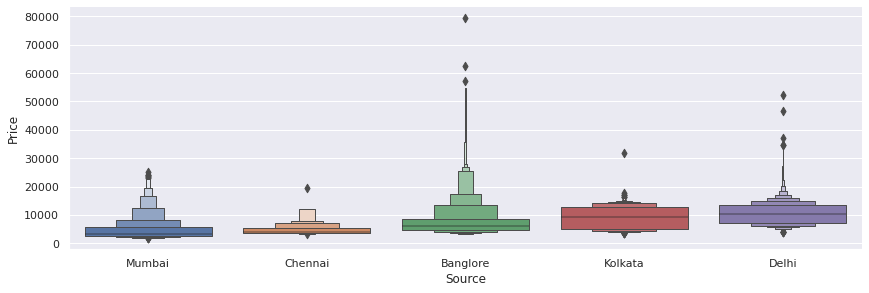

In [39]:
sns.catplot(y='Price', x='Source', data=train_data.sort_values('Price',  ascending=True), kind='boxen', height=4, aspect=3)
plt.show()

In [40]:
Source=train_data['Source']
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
Source1=test_data['Source']
Source1=pd.get_dummies(Source1, drop_first=True)
Source1.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [42]:
train_data['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

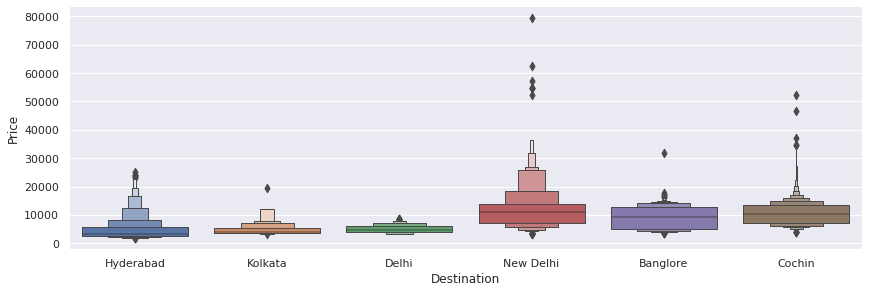

In [44]:
sns.catplot(y='Price', x='Destination', data=train_data.sort_values('Price',  ascending=True), kind='boxen', height=4, aspect=3)
plt.show()

In [45]:
Destination=train_data['Destination']
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
Destination1=test_data['Destination']
Destination1=pd.get_dummies(Destination1, drop_first=True)
Destination1.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [47]:
train_data['Route']

0                                BLR → DEL
1                    CCU → IXR → BBI → BLR
2                    DEL → LKO → BOM → COK
3                          CCU → NAG → BLR
4                          BLR → NAG → DEL
5                                CCU → BLR
6                          BLR → BOM → DEL
7                          BLR → BOM → DEL
8                          BLR → BOM → DEL
9                          DEL → BOM → COK
10                         DEL → BLR → COK
11                               CCU → BLR
12                               MAA → CCU
13                         CCU → BOM → BLR
14                               CCU → BLR
15                   DEL → AMD → BOM → COK
16                         DEL → PNQ → COK
17                         DEL → BOM → COK
18                   DEL → CCU → BOM → COK
19                         DEL → BOM → COK
20                         DEL → BOM → COK
21                         BLR → COK → DEL
22                               BLR → DEL
23         

In [48]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [49]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [50]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [51]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [52]:
## drop the additional info(becoz no info have 80% ) and Route from the data 
train_data.drop(['Additional_Info','Route'], axis=1, inplace=True)
test_data.drop(['Additional_Info','Route'], axis=1, inplace=True)


In [53]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [54]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# train_data['Total_Stops']=encoder.fit_transform(train_data['Total_Stops'])
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4}, inplace=True)
test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4}, inplace=True)

In [56]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [57]:
test_data['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [58]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [59]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [60]:
train_data.drop(['Airline','Source','Destination'], axis=1, inplace=True)
test_data.drop(['Airline','Source','Destination'], axis=1, inplace=True)


In [61]:
## concatenate the all columns
train_data1=pd.concat([train_data, Airline, Destination, Source], axis=1)
test_data1=pd.concat([test_data, Airline1, Destination1, Source1],axis=1)

In [96]:
print(train_data1.shape)
train_data1.head()

(10682, 30)


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
test_data1.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
X=train_data1.drop('Price', axis=1)
y=train_data1['Price']

<AxesSubplot:>

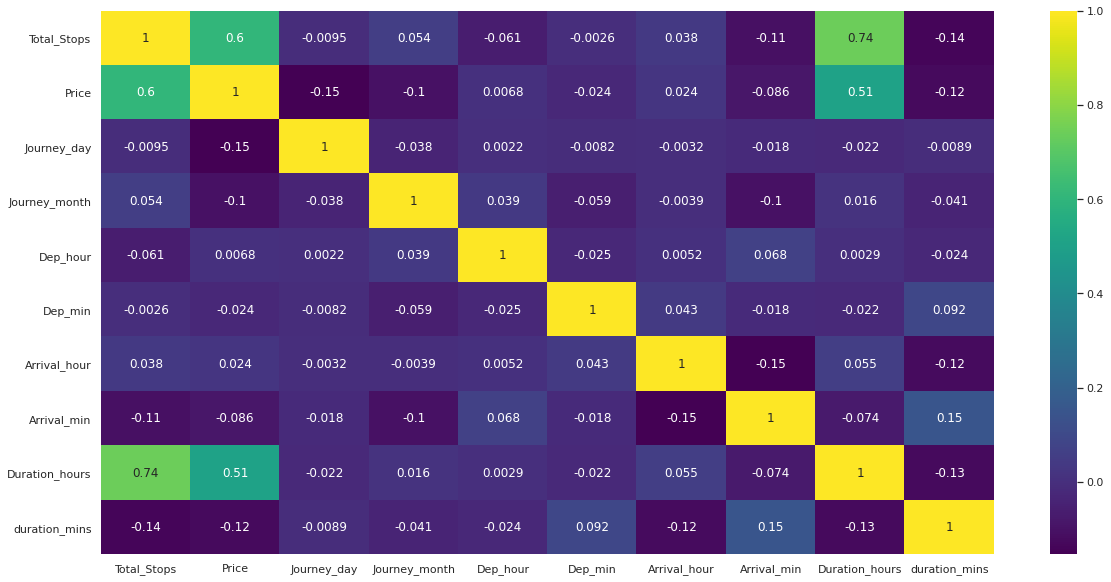

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [66]:
X.isnull().sum()

Total_Stops                          0
Journey_day                          0
Journey_month                        0
Dep_hour                             0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Duration_hours                       0
duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Chennai                  

In [67]:
## feature importance using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
extratree=ExtraTreesRegressor()
extratree.fit(X, y)

ExtraTreesRegressor()

In [68]:
extratree.feature_importances_

array([2.32533258e-01, 1.42771312e-01, 5.36377553e-02, 2.48706884e-02,
       2.15226887e-02, 2.82220534e-02, 1.90304323e-02, 1.12316414e-01,
       1.74806943e-02, 9.57065965e-03, 1.85581444e-03, 1.59773468e-02,
       1.43051399e-01, 6.72205872e-02, 2.01150101e-02, 8.93126508e-04,
       2.62675199e-03, 1.08699515e-04, 5.19783321e-03, 8.72792692e-05,
       1.04230997e-02, 1.68700434e-02, 6.10936030e-03, 4.42432222e-04,
       2.47786457e-02, 5.25917121e-04, 9.14600736e-03, 3.21525525e-03,
       9.39943472e-03])

<AxesSubplot:>

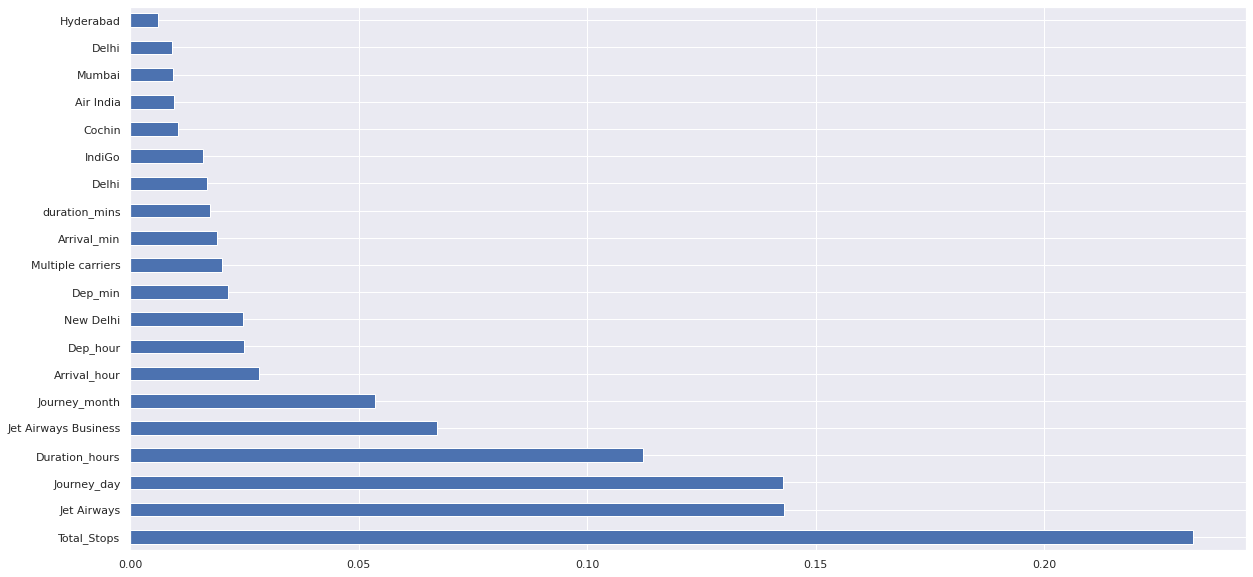

In [69]:
plt.figure(figsize=(20,10))
feature_imp=pd.Series(extratree.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

## Fitting model using random forest

In [70]:
from sklearn.model_selection import train_test_split
X_train ,x_test, y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(X_train ,y_train)

RandomForestRegressor()

In [72]:
y_pred=random.predict(x_test)

In [73]:
print('training set score : {}'.format(random.score(X_train ,y_train)))
print("testing set score :{}".format(random.score(x_test, y_test)))

training set score : 0.9558164158589904
testing set score :0.8040590945044926


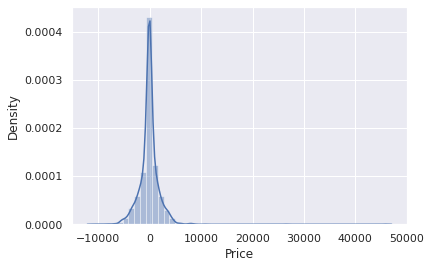

In [74]:
sns.distplot(y_test-y_pred)
plt.show()

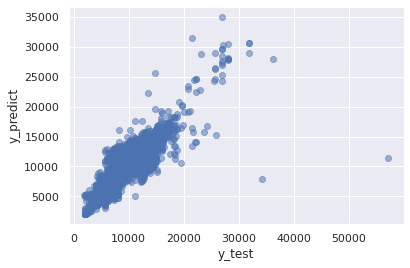

In [75]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))
print('MSE : {}'.format(mean_squared_error(y_test, y_pred)))
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

MAE : 1166.8913864497438
MSE : 3997376.02689983
RMSE : 1999.3438991078624


In [77]:
r2_score(y_test, y_pred)

0.8040590945044926

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [79]:
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(X_train ,y_train)
print("training set score :{}".format(tree.score(X_train ,y_train)))
print("testing set score : {}".format(tree.score(x_test, y_test)))

training set score :0.8514530635165416
testing set score : 0.7521751117874725


In [80]:
ada=AdaBoostRegressor()
ada.fit(X_train ,y_train)
print("training set score :{}".format(ada.score(X_train ,y_train)))

training set score :0.42653868746778556


In [81]:
random1=RandomForestRegressor(n_estimators=200, max_depth=13)
random1.fit(X_train ,y_train)
random1.score(X_train ,y_train)

0.9309879665740657

In [82]:
random.score(x_test ,y_test)

0.8040590945044926

In [83]:
prediction=random1.predict(x_test)


In [84]:
print("MAE : {}".format(mean_absolute_error(y_test, prediction)))
print('MSE : {}'.format(mean_squared_error(y_test, prediction)))
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test, prediction))))

MAE : 1153.6531879832764
MSE : 3631611.0366577874
RMSE : 1905.6786289030445


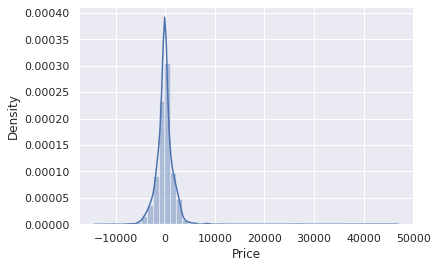

In [85]:
sns.distplot(y_test-prediction)
plt.show()

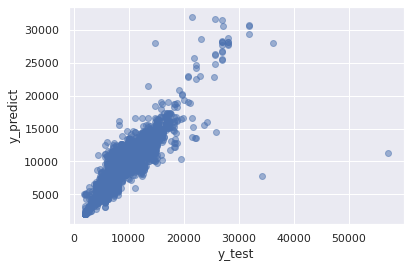

In [97]:
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()